In [1]:
#import package
import numpy as np  
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df_train=pd.read_csv('data-train.csv')
df_train.head(

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [3]:
#check missing values
print('Rows      :', df_train.shape[0])	
print('Columns   :', df_train.shape[1])
print('\nMissing values:\n', df_train.isnull().sum().values.sum())

Rows      : 33908
Columns   : 17

Missing values:
 0


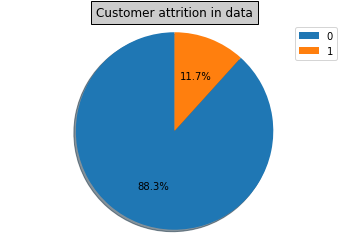

In [5]:
churn = df_train[df_train['labels'] == 1]
not_churn = df_train[df_train['labels'] == 0]

lab = df_train['labels'].value_counts().keys().tolist()
val = df_train['labels'].value_counts().values.tolist()

#imbalance dataset, may consider upsampling/undersampling/SMOTE
fig1, ax1 = plt.subplots()
ax1.pie(val,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer attrition in data", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(labels=lab)
plt.show()

In [6]:
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


plot of feature feature_0 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDDC9970>, <matplotlib.lines.Line2D object at 0x000001D1EDDC9CD0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDDD8070>, <matplotlib.lines.Line2D object at 0x000001D1EDDD83D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDDC9610>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDDD8730>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDDD8A30>], 'means': []}


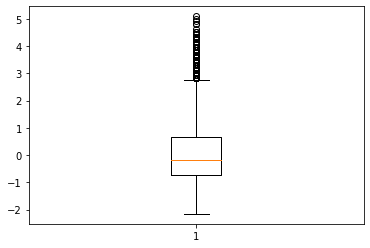

plot of feature feature_1 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDE32EB0>, <matplotlib.lines.Line2D object at 0x000001D1EDE3F250>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDE3F5B0>, <matplotlib.lines.Line2D object at 0x000001D1EDE3F910>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDE32B50>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDE3FC70>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDE3FF70>], 'means': []}


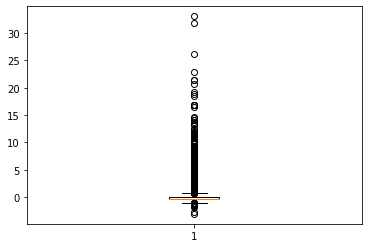

plot of feature feature_2 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDE93C70>, <matplotlib.lines.Line2D object at 0x000001D1EDE93FD0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDEA0370>, <matplotlib.lines.Line2D object at 0x000001D1EDEA06D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDE93910>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDEA0A30>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDEA0D30>], 'means': []}


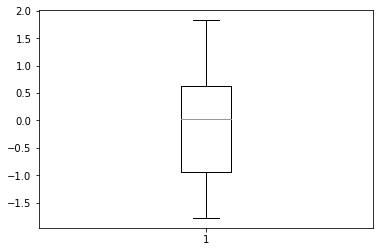

plot of feature feature_3 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDEF2AF0>, <matplotlib.lines.Line2D object at 0x000001D1EDEF2E50>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDEFD1F0>, <matplotlib.lines.Line2D object at 0x000001D1EDEFD550>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDEF2790>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDEFD8B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDEFDBB0>], 'means': []}


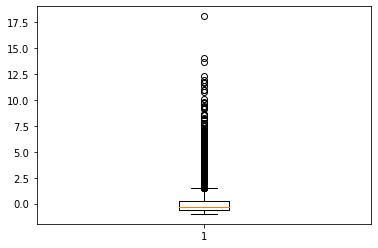

plot of feature feature_4 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDF4DA30>, <matplotlib.lines.Line2D object at 0x000001D1EDF4DD90>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDF5B130>, <matplotlib.lines.Line2D object at 0x000001D1EDF5B490>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDF4D6D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDF5B7F0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDF5BAF0>], 'means': []}


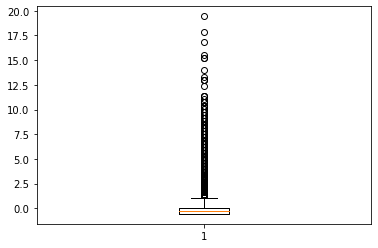

plot of feature feature_5 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDFA8DF0>, <matplotlib.lines.Line2D object at 0x000001D1EDFB8190>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDFB84F0>, <matplotlib.lines.Line2D object at 0x000001D1EDFB8850>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDFA8A90>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDFB8BB0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDFB8EB0>], 'means': []}


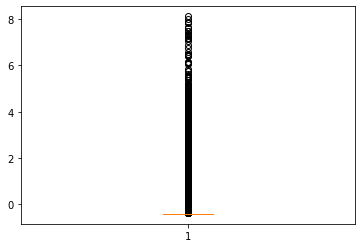

plot of feature feature_6 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDFFFC70>, <matplotlib.lines.Line2D object at 0x000001D1EDFFFFD0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EE00D370>, <matplotlib.lines.Line2D object at 0x000001D1EE00D6D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDFFF910>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EE00DA30>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EE00DD30>], 'means': []}


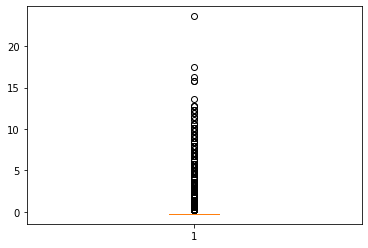

plot of feature feature_7 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EE057AC0>, <matplotlib.lines.Line2D object at 0x000001D1EE057E20>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EE0631C0>, <matplotlib.lines.Line2D object at 0x000001D1EE063520>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EE057760>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EE063880>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EE063B80>], 'means': []}


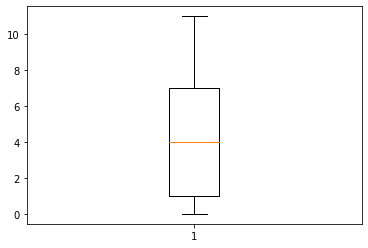

plot of feature feature_8 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDFF3430>, <matplotlib.lines.Line2D object at 0x000001D1EDFF3070>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EE02BF10>, <matplotlib.lines.Line2D object at 0x000001D1EE031EE0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDFF3FD0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EE031610>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EE031910>], 'means': []}


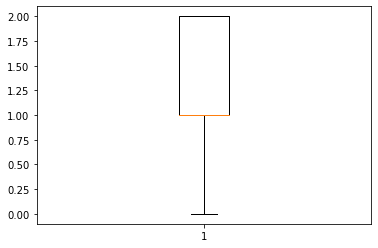

plot of feature feature_9 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDF6F070>, <matplotlib.lines.Line2D object at 0x000001D1EDF12E80>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDF12A90>, <matplotlib.lines.Line2D object at 0x000001D1EDF12820>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDF6F190>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDF12400>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDF0CA90>], 'means': []}


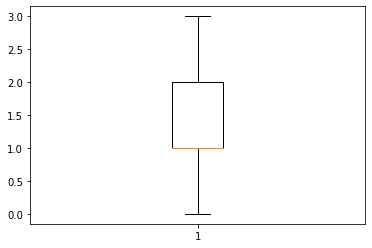

plot of feature feature_10 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDE50B50>, <matplotlib.lines.Line2D object at 0x000001D1EDE56EB0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDE56B50>, <matplotlib.lines.Line2D object at 0x000001D1EDE56E20>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDE509D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDE56670>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDE56400>], 'means': []}


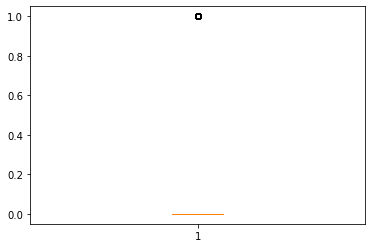

plot of feature feature_11 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1F01D1220>, <matplotlib.lines.Line2D object at 0x000001D1F01D17C0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDD7B070>, <matplotlib.lines.Line2D object at 0x000001D1EDD7B4C0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1F01D1A00>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDD7B2B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDD7BDC0>], 'means': []}


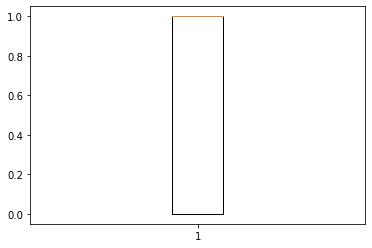

plot of feature feature_12 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDDA7610>, <matplotlib.lines.Line2D object at 0x000001D1EDDA7940>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDDA71C0>, <matplotlib.lines.Line2D object at 0x000001D1EDDA7DC0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDE6E730>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EE096310>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EE096610>], 'means': []}


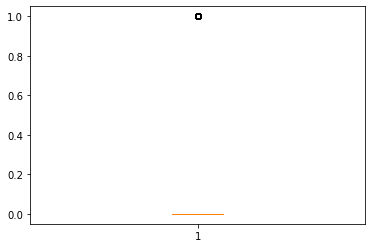

plot of feature feature_13 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EE09D8E0>, <matplotlib.lines.Line2D object at 0x000001D1EE09DC40>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EE09DFA0>, <matplotlib.lines.Line2D object at 0x000001D1EE0A8340>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EE09D580>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EE0A86A0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EE0A89A0>], 'means': []}


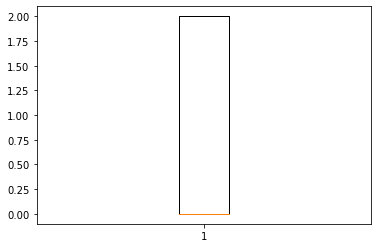

plot of feature feature_14 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDE2AC10>, <matplotlib.lines.Line2D object at 0x000001D1EDE2AF70>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDE2E310>, <matplotlib.lines.Line2D object at 0x000001D1EDE2E670>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDE2A8B0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDE2E9D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDE2ECD0>], 'means': []}


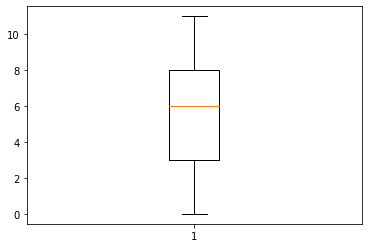

plot of feature feature_15 is {'whiskers': [<matplotlib.lines.Line2D object at 0x000001D1EDEFDF40>, <matplotlib.lines.Line2D object at 0x000001D1EDEEC2E0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D1EDEEC640>, <matplotlib.lines.Line2D object at 0x000001D1EDEEC9A0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D1EDEFDBE0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D1EDEECD00>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D1EDEEE040>], 'means': []}


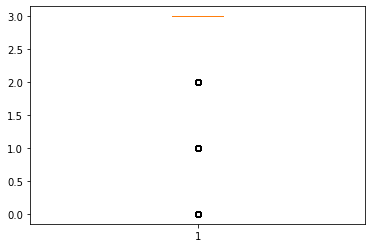

In [7]:
for col in df_train.columns:
    if col.startswith('feature'):
        plot = plt.boxplot(df_train[col])
        print(f'plot of feature {col} is {plot}')
        plt.show()

In [41]:
from scipy import stats
z=np.abs(stats.zscore(df_train))
threshold=3.5
print(np.where(abs(z)>threshold))

(array([    5,    35,    40, ..., 33892, 33902, 33903], dtype=int64), array([6, 4, 3, ..., 6, 3, 5], dtype=int64))


In [42]:
#drop outliers based on z score
df1=df_train[(abs(z)<threshold).all(axis=1)]
df1.shape

(31211, 17)

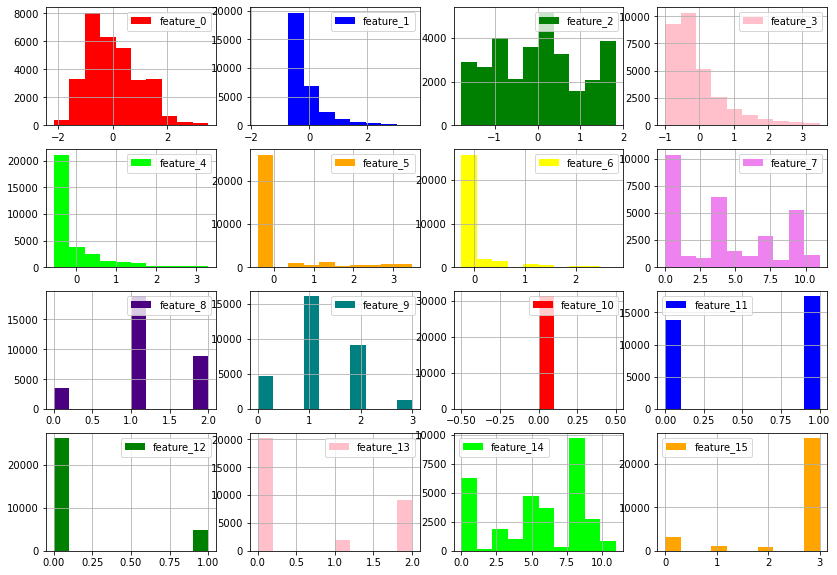

In [43]:
#check distribution after removing outliers
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange']
for i,j in zip(range(1,17),df1.columns[:-1]):
    plt.subplot(4,4,i)
    df1[j].hist(color = clr[i-1], label=j)
    plt.legend()

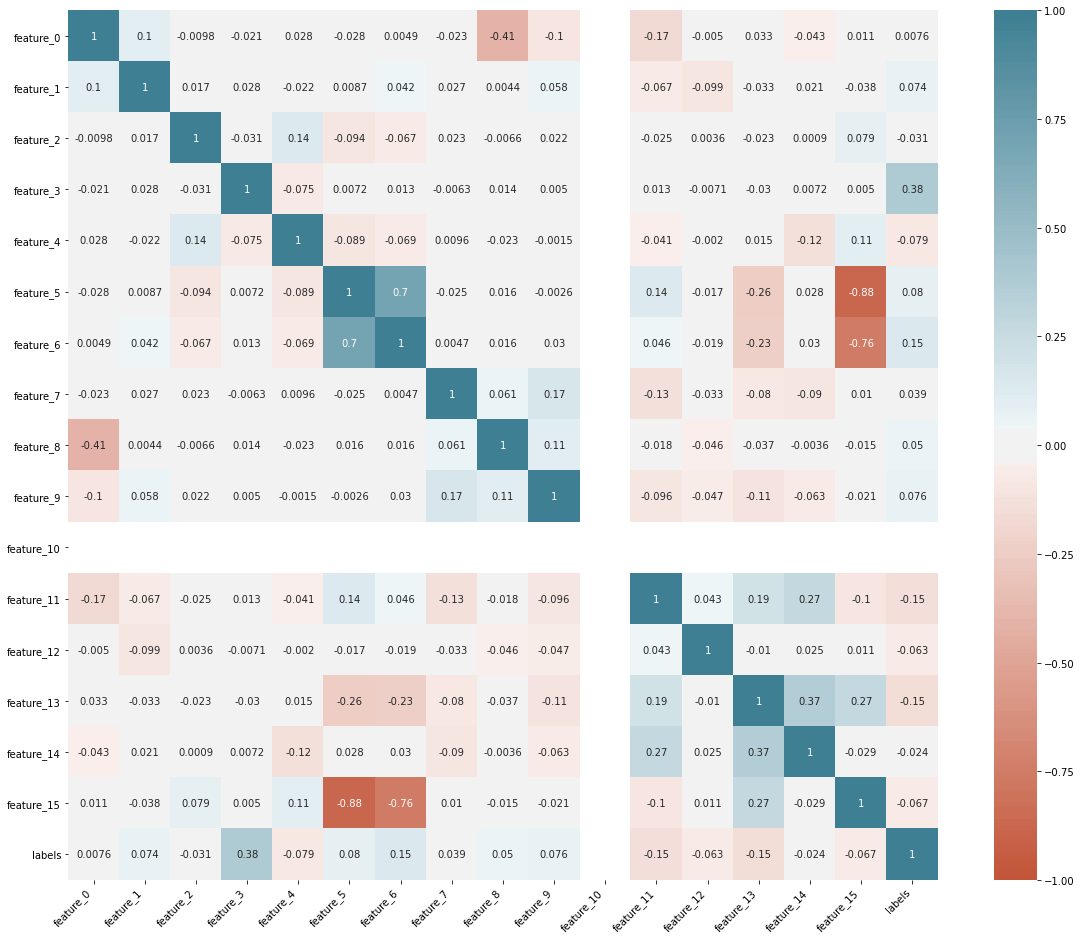

In [44]:
plt.figure(figsize=(20,16))
corr = df1.corr()
ax = sns.heatmap(corr, 
    annot=True,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [45]:
df1.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [46]:
from sklearn.model_selection import train_test_split
x = df1.drop(['labels'], axis=1)
y = df1['labels']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report,f1_score

In [61]:
#the recall of label=1 shows the model is more biased towards majority class.
# we are interested in high F1 score ( false negative is more important)
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
grid={"C":[0.001,.009,0.01,.09,1,5,10,25], "penalty":["l1","l2"]}
clf_lr = GridSearchCV(logistic, grid, cv=5, verbose=0)
best_model = clf_lr.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

y_pred_lr=best_model.predict(X_test)
#Check Prediction Score
print("Accuracy of Logistic Regression: ",accuracy_score(y_test, y_pred_lr))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Best Penalty: l2
Best C: 5
Accuracy of Logistic Regression:  0.899508756941478
Confusion matrix 
 [[8200  171]
 [ 770  223]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8371
           1       0.57      0.22      0.32       993

    accuracy                           0.90      9364
   macro avg       0.74      0.60      0.63      9364
weighted avg       0.88      0.90      0.88      9364



In [50]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)
best_clf_rf = clf.fit(X_train, y_train)
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Random Forest:  0.910615121742845
Confusion matrix 
 [[8191  180]
 [ 657  336]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8371
           1       0.65      0.34      0.45       993

    accuracy                           0.91      9364
   macro avg       0.79      0.66      0.70      9364
weighted avg       0.90      0.91      0.90      9364



In [17]:
#如果Feature的数量很大，跟样本数量差不多，这时候选用LR或者是Linear Kernel的SVM2. 
#如果Feature的数量比较小，样本数量一般，不算大也不算小，选用SVM+Gaussian Kernel3. 
#如果Feature的数量比较小，而样本数量很多，需要手工添加一些feature变成第一种情况

from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
gridsvm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=1) 
gridsvm.fit(X_train, y_train)  

# print best parameter after tuning 
print(gridsvm.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(gridsvm.best_estimator_)

# print prediction results 
predictions_svm = gridsvm.predict(X_test) 
print("Accuracy of SVM: ",accuracy_score(y_test, predictions_svm))

print(classification_report(y_test, predictions_svm))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=  21.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=  25.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=  23.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=  21.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   4.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   4.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  9.9min finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)
Accuracy of SVM:  0.9137141888455671
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5314
           1       0.70      0.22      0.34       585

    accuracy                           0.91      5899
   macro avg       0.81      0.61      0.65      5899
weighted avg       0.90      0.91      0.89      5899



In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train,y_train))
predictions = mlp.predict(X_test)

#Check Prediction Score
print("Accuracy of MLP: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Iteration 1, loss = 0.31773859
Iteration 2, loss = 0.25564336
Iteration 3, loss = 0.24893186
Iteration 4, loss = 0.24582187
Iteration 5, loss = 0.24255395
Iteration 6, loss = 0.23964737
Iteration 7, loss = 0.23683988
Iteration 8, loss = 0.23337565
Iteration 9, loss = 0.23067565
Iteration 10, loss = 0.22871521
Iteration 11, loss = 0.22741091
Iteration 12, loss = 0.22530136
Iteration 13, loss = 0.22652908
Iteration 14, loss = 0.22520118
Iteration 15, loss = 0.22374078
Iteration 16, loss = 0.22327488
Iteration 17, loss = 0.22144422
Iteration 18, loss = 0.22073736
Iteration 19, loss = 0.22192694
Iteration 20, loss = 0.22112616
Iteration 21, loss = 0.22013472
Iteration 22, loss = 0.22086454
Iteration 23, loss = 0.21884949
Iteration 24, loss = 0.21961300
Iteration 25, loss = 0.22005846
Iteration 26, loss = 0.21885642
Iteration 27, loss = 0.21947215
Iteration 28, loss = 0.21972464
Iteration 29, loss = 0.21985602
Iteration 30, loss = 0.21821780
Iteration 31, loss = 0.21919250
Iteration 32, los

In [55]:
#smote - only on training set
from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy=0.5,random_state=42) 
sm=SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0))) 

After OverSampling, the shape of train_X: (39022, 16)
After OverSampling, the shape of train_y: (39022,) 

After OverSampling, counts of label '1': 19511
After OverSampling, counts of label '0': 19511


In [56]:
#scaling??? - required for methods using E-distance
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_data = trans.fit_transform(X_train_sm)
test_data = trans.fit_transform(X_test)

In [62]:
logreg = linear_model.LogisticRegression()
grid={"C":[0.001,.009,0.01,.09,1,5,10,25], "penalty":["l1","l2"]}
clf_lr2 = GridSearchCV(logreg, grid, cv=5, verbose=0)
best_model_lr = clf_lr2.fit(train_data, y_train_sm)
y_pred_lr=best_model_lr.predict(test_data)
#Check Prediction Score
print("Accuracy of Logistic Regression after SMOTE: ",accuracy_score(y_test, y_pred_lr))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Accuracy of Logistic Regression after SMOTE:  0.8180264844083724
Confusion matrix 
 [[6926 1445]
 [ 259  734]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8371
           1       0.34      0.74      0.46       993

    accuracy                           0.82      9364
   macro avg       0.65      0.78      0.68      9364
weighted avg       0.90      0.82      0.85      9364



In [58]:
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf_rf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)
best_rf_sm = clf_rf.fit(train_data, y_train_sm)
predictions_rf = best_rf_sm.predict(test_data)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions_rf))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))

Accuracy of Random Forest:  0.8978000854335754
Confusion matrix 
 [[7907  464]
 [ 493  500]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8371
           1       0.52      0.50      0.51       993

    accuracy                           0.90      9364
   macro avg       0.73      0.72      0.73      9364
weighted avg       0.90      0.90      0.90      9364



In [ ]:
gridsvm.fit(train_data, y_train_sm)   
# print prediction results 
predictions_svm_sm = gridsvm.predict(test_data) 
print("Accuracy of SVM: ",accuracy_score(y_test, predictions_svm_sm))

print(classification_report(y_test, predictions_svm_sm))

In [59]:
mlp.fit(train_data ,y_train_sm)
print("Training set score: %f" % mlp.score(train_data,y_train_sm))
predictions_nn = mlp.predict(test_data)

#Check Prediction Score
print("Accuracy of MLP after SMOTE: ",accuracy_score(y_test, predictions_nn))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions_nn))
print("F1 score \n",f1_score(y_test,predictions_nn))
print(classification_report(y_test,predictions_nn))

Iteration 1, loss = 0.45419456
Iteration 2, loss = 0.37337429
Iteration 3, loss = 0.36112881
Iteration 4, loss = 0.35177134
Iteration 5, loss = 0.34507552
Iteration 6, loss = 0.34057793
Iteration 7, loss = 0.33468860
Iteration 8, loss = 0.33069563
Iteration 9, loss = 0.32988817
Iteration 10, loss = 0.32794072
Iteration 11, loss = 0.32652008
Iteration 12, loss = 0.32368279
Iteration 13, loss = 0.32393664
Iteration 14, loss = 0.32233345
Iteration 15, loss = 0.32245811
Iteration 16, loss = 0.32022704
Iteration 17, loss = 0.31918431
Iteration 18, loss = 0.31812450
Iteration 19, loss = 0.31599594
Iteration 20, loss = 0.31470256
Iteration 21, loss = 0.31480704
Iteration 22, loss = 0.31379733
Iteration 23, loss = 0.31408201
Iteration 24, loss = 0.31320264
Iteration 25, loss = 0.31216233
Iteration 26, loss = 0.31103398
Iteration 27, loss = 0.31176947
Iteration 28, loss = 0.31116617
Iteration 29, loss = 0.31058409
Iteration 30, loss = 0.31093832
Iteration 31, loss = 0.30931686
Iteration 32, los

In [63]:
#ADASYN
from imblearn.over_sampling import ADASYN
ada=ADASYN(sampling_strategy='minority',random_state=420,n_neighbors=5)
X_res,y_res=ada.fit_resample(X_train,y_train)

In [64]:
from collections import Counter
print(Counter(y_res))

Counter({1: 19538, 0: 19511})


In [65]:
logreg = linear_model.LogisticRegression()
grid={"C":[0.001,.009,0.01,.09,1,5,10,25], "penalty":["l1","l2"]}
clf_lr3 = GridSearchCV(logreg, grid, cv=5, verbose=0)
best_model_lr3 = clf_lr3.fit(X_res, y_res)
y_pred_lr3=best_model_lr3.predict(X_test)
#Check Prediction Score
print("Accuracy of Logistic Regression after SMOTE: ",accuracy_score(y_test, y_pred_lr3))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred_lr3))
print(classification_report(y_test,y_pred_lr3))

Accuracy of Logistic Regression after SMOTE:  0.8055318240068347
Confusion matrix 
 [[6795 1576]
 [ 245  748]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8371
           1       0.32      0.75      0.45       993

    accuracy                           0.81      9364
   macro avg       0.64      0.78      0.67      9364
weighted avg       0.90      0.81      0.84      9364



In [66]:
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf_rf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)
best_rf_sm = clf_rf.fit(X_res, y_res)
predictions_rf = best_rf_sm.predict(test_data)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions_rf))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))

Accuracy of Random Forest:  0.5005339598462195
Confusion matrix 
 [[3917 4454]
 [ 223  770]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63      8371
           1       0.15      0.78      0.25       993

    accuracy                           0.50      9364
   macro avg       0.55      0.62      0.44      9364
weighted avg       0.86      0.50      0.59      9364



In [67]:
mlp.fit(train_data ,y_train_sm)
print("Training set score: %f" % mlp.score(X_res,y_res))
predictions_nn = mlp.predict(test_data)

#Check Prediction Score
print("Accuracy of MLP after SMOTE: ",accuracy_score(y_test, predictions_nn))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions_nn))
print("F1 score \n",f1_score(y_test,predictions_nn))
print(classification_report(y_test,predictions_nn))

Iteration 1, loss = 0.45419456
Iteration 2, loss = 0.37337429
Iteration 3, loss = 0.36112881
Iteration 4, loss = 0.35177134
Iteration 5, loss = 0.34507552
Iteration 6, loss = 0.34057793
Iteration 7, loss = 0.33468860
Iteration 8, loss = 0.33069563
Iteration 9, loss = 0.32988817
Iteration 10, loss = 0.32794072
Iteration 11, loss = 0.32652008
Iteration 12, loss = 0.32368279
Iteration 13, loss = 0.32393664
Iteration 14, loss = 0.32233345
Iteration 15, loss = 0.32245811
Iteration 16, loss = 0.32022704
Iteration 17, loss = 0.31918431
Iteration 18, loss = 0.31812450
Iteration 19, loss = 0.31599594
Iteration 20, loss = 0.31470256
Iteration 21, loss = 0.31480704
Iteration 22, loss = 0.31379733
Iteration 23, loss = 0.31408201
Iteration 24, loss = 0.31320264
Iteration 25, loss = 0.31216233
Iteration 26, loss = 0.31103398
Iteration 27, loss = 0.31176947
Iteration 28, loss = 0.31116617
Iteration 29, loss = 0.31058409
Iteration 30, loss = 0.31093832
Iteration 31, loss = 0.30931686
Iteration 32, los